<a href="https://colab.research.google.com/github/PhanQuangTan/CS114.K21/blob/master/sarcasm_detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd


In [0]:
import os
print(os.listdir("/content/drive"))

['.shortcut-targets-by-id', 'My Drive', '.Trash']


In [0]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def parseJson(fname):
    for line in open(fname,'r'):
        yield eval(line)

In [0]:
file_name = '/content/drive/My Drive/train/Sarcasm/Sarcasm_Headlines_Dataset_v2.json'
data = list(parseJson(file_name))

In [0]:
df = pd.DataFrame(data)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [0]:
df = df.drop('article_link', axis = 1)
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [0]:
df['len'] = df['headline'].apply(lambda x: len(x.split(' ')))
df.head()

,is_sarcastic,headline,len
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


In [0]:
df_length = df['len'].value_counts().reset_index()
df_length.rename(columns = {'index' : 'length_word', 'len' : 'frequency'}, inplace = True)
df_length.head()

,length_word,frequency
0,10,3636
1,9,3423
2,11,3395
3,8,2939
4,12,2843


<BarContainer object of 34 artists>

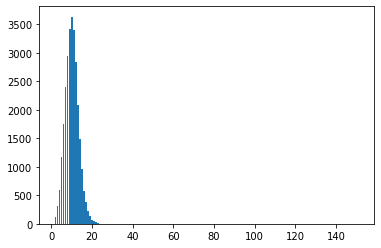

In [0]:
import matplotlib.pyplot as plt
plt.bar(df_length['length_word'], df_length['frequency'])

In [0]:
print('shape before preprocessing ',df.shape)
df = df[df['len'] < 19]
print('shape after preprocessing ',df.shape)
df.head()

shape before preprocessing  (28619, 3)
shape after preprocessing  (28313, 3)


,is_sarcastic,headline,len
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


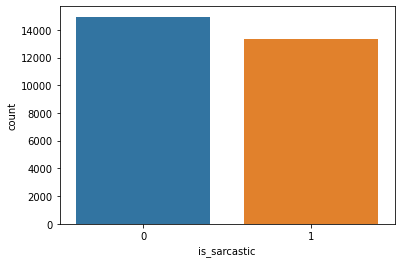

In [0]:
sns.countplot(df['is_sarcastic'])

In [0]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features= 5000)
X = tf.fit_transform(df['headline'])
y = df['is_sarcastic']

In [0]:
print(X)

  (0, 2499)	0.4358681619348598
  (0, 1777)	0.41154545895134315
  (0, 2907)	0.14975171023722855
  (0, 811)	0.47581943283972666
  (0, 4619)	0.49637728506782514
  (0, 3669)	0.38135175902289503
  (1, 1314)	0.32945387719551705
  (1, 3377)	0.3346971495219715
  (1, 1643)	0.32197569241510615
  (1, 2982)	0.13970564004930916
  (1, 3787)	0.3072096547951968
  (1, 1400)	0.33112825088722697
  (1, 2125)	0.15721325312724616
  (1, 884)	0.25908611658556785
  (1, 4842)	0.20560677727090917
  (1, 2769)	0.3532359791194354
  (1, 4492)	0.29637509237189563
  (1, 3482)	0.3248055357456655
  (2, 3435)	0.5693777833186864
  (2, 1116)	0.5165783669925393
  (2, 4987)	0.348750700703534
  (2, 1242)	0.5360304836268311
  (3, 4468)	0.5123238474916283
  (3, 4917)	0.41036651950173947
  (3, 4342)	0.15629438807694507
  :	:
  (28310, 83)	0.36563615168303926
  (28310, 3363)	0.30832322832592374
  (28310, 442)	0.2991650357020823
  (28310, 4293)	0.3017785574282659
  (28310, 4785)	0.2593846959011956
  (28310, 646)	0.3232422901559689

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [0]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[3750,  691],
       [ 706, 3347]])

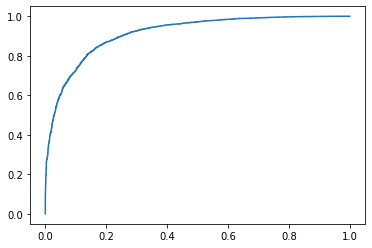

In [0]:
proba = nb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, proba)

auc_val = auc(fpr,tpr)
plt.plot(fpr, tpr)

In [0]:
f1_score(y_pred, y_test)

0.8273390186627116

In [0]:
from xgboost import XGBClassifier
for i in range(10, 12):
    model = XGBClassifier(max_depth = i, n_jobs=4 )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f1_score(y_pred, y_test))

0.7864889290555808
0.7909771026978009


In [0]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def process(x):
    token_list = x.split()
    new_list = [w.lower() for w in token_list if w not in string.punctuation]
    new_list = [w for w in new_list if w not in stop_words]
    new_list = [wordnet_lemmatizer.lemmatize(w) for w in new_list]
    return " ".join(new_list)

df['headline'] = df['headline'].apply(process)

In [0]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features= 5000, token_pattern="[a-zA-Z]{2,}", norm='l1')
X = tf.fit_transform(df['headline'])
y = df['is_sarcastic']
df.drop('len', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

for i in range(15, 20):
    model = XGBClassifier(max_depth = i, n_jobs = 8)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f1_score(y_pred, y_test))

0.6418492945061544
0.6453055141579732
0.647933392804044
0.6527469272915741
0.6491435321913762


In [0]:
tf.get_feature_names()[:10]

['aaron',
 'abandoned',
 'abc',
 'ability',
 'able',
 'abortion',
 'abrams',
 'abroad',
 'absence',
 'absolutely']

In [0]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
f1_score(y_pred, y_test)

0.7646386383843516

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1_score(y_pred, y_test)

0.7261856230466096

In [0]:
vec = CountVectorizer(ngram_range=(1,2), max_features=5000,  token_pattern="[a-zA-Z]{2,}")
X = vec.fit_transform(df['headline'])
y = df['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [0]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
f1_score(y_pred, y_test)

0.7738555569414992

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_pred, y_test)

0.762681621208259

In [0]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_pred, y_test)

0.7576023025904143

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_pred, y_test)

0.7337951509153885